# SDS Challenge #2 - Used Car Prices

## Problem Statement

Welcome Data Scientist to the 2nd SDS Club Monthly Challenge! This month you have been hired by a new car trader company to help sell its used cars. You will be analyzing used cars from multiple manufacturers and of different models. Your job is to help the car trader company determine the price of its used cars.

## Evaluation

\begin{equation*}
MSE = {\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat{y}_{i})^{2}}
\end{equation*}
<br>

## Understanding the Dataset

Each column in the dataset is labeled and explained in more detail below. <br><br>
**manufacturer_name:** the name of the car manufacturer <br>
**model_name:** the name of the car model <br>
**transmission:** the type of transmission the car has <br>
**color:** the body color of the car <br>
**odometer_value:** odometer state in kilometers <br>
**year_produced:** the year the car was produced <br>
**engine_fuel:** the fuel type of the engine of the car <br>
**engine_has_gas:** whether or not the car has a propane tank with tubing <br>
**engine_type:** the engine type of the car <br>
**engine_capacity:** capacity of the engine in liters <br>
**body_type:** the of body the car has <br>
**has_warranty:** whether the car has warranty <br>
**state:** the state of the car (new, owned, etc.) <br>
**drivetrain:** type of drivetrain (front, rear, all) <br>
**feature_1 - feature_9:** these features are boolean values about properties of the car<br>
**duration_listed:** the number of days the car is listed in the catalog <br>
**price_usd:** price of the car in USD <br>

##  Dataset Files
**public_cars.csv** - Dataset to train and analyze <br>
**pred_cars.csv** - Dataset to predict cars prices

## Submission

All submissions should be sent through email to <challenges@superdatascience.com>. When submitting, the file should contain predictions made on the pred_cars.csv file, and it should have the following format:

In [ ]:
12000
19500
6000
7500
24000

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.tsa.api as smt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy as sp
import numpy as np

In [3]:
df_cars = pd.read_csv('../data/public_cars.csv')

In [4]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30824 entries, 0 to 30823
Data columns (total 26 columns):
manufacturer_name    30824 non-null object
model_name           30824 non-null object
transmission         30824 non-null object
color                30824 non-null object
odometer_value       30824 non-null int64
year_produced        30824 non-null int64
engine_fuel          30824 non-null object
engine_has_gas       30824 non-null bool
engine_type          30824 non-null object
engine_capacity      30816 non-null float64
body_type            30824 non-null object
has_warranty         30824 non-null bool
state                30824 non-null object
drivetrain           30824 non-null object
feature_0            30824 non-null bool
feature_1            30824 non-null bool
feature_2            30824 non-null bool
feature_3            30824 non-null bool
feature_4            30824 non-null bool
feature_5            30824 non-null bool
feature_6            30824 non-null bool
feature

In [25]:
df_cars.dropna(inplace=True)
X=df_cars[['odometer_value','engine_capacity','duration_listed']]
y= df_cars['price_usd']
normalized_X=(X-X.mean())/X.std()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(normalized_X, y, 
                                                    test_size=0.10, 
                                                    random_state=42)

In [27]:
normalized_X=sm.add_constant(X_train)
mod = sm.OLS(y_train, X_train)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:              price_usd   R-squared (uncentered):                   0.143
Model:                            OLS   Adj. R-squared (uncentered):              0.143
Method:                 Least Squares   F-statistic:                              1544.
Date:                Sat, 28 Nov 2020   Prob (F-statistic):                        0.00
Time:                        16:57:38   Log-Likelihood:                     -2.9039e+05
No. Observations:               27734   AIC:                                  5.808e+05
Df Residuals:                   27731   BIC:                                  5.808e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

c:\program files\python38\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [28]:
res.params

odometer_value    -2962.092508
engine_capacity    2208.102701
duration_listed      35.820958
dtype: float64

In [29]:
y_pred = res.predict(X_test)
residual = y_test - y_pred

In [30]:
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X_train.columns).T

,odometer_value,engine_capacity,duration_listed
vif,1.012138,1.018448,1.0063


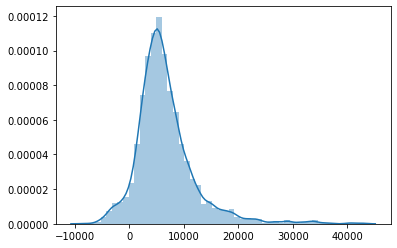

In [31]:
sns.distplot(residual)

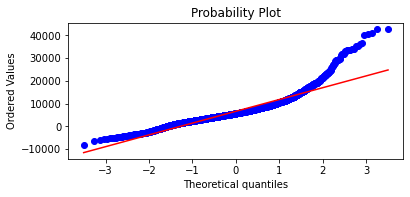

In [32]:
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

In [33]:
np.mean(residual)

6610.435438084139

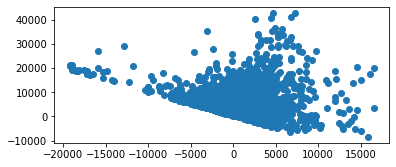

In [34]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)